# Shopping at the Kalverstraat

## Abstract

The Kalverstraat is one of the busiest shopping streets of Amsterdam. Known by the tourists, hated by the locals... Due to tourism the street is barely reachable and extremely expensive! In 2009 it was th 17th most expensive street in the world measured by rent prices ([source](https://web.archive.org/web/20131115020633/http://www.parool.nl/parool/nl/4/AMSTERDAM/article/detail/3544150/2013/11/13/Kalverstraat-stijgt-plek-in-lijst-duurste-winkelstraten.dhtml)).

In this research I would like to identify when I can go shopping with my friends in peace. I will identify the busiest times and when it is save for us to go shopping. I'll also identify trends between traffic intensity and seasonal variations, f.i. does the rain influence the amount of people? 

## Skills

I have applied the following skills during this research:

## Data Source

The data originated from the Langzaam Verkeer Monitoringsysteem Amsterdam ([LVMA](https://data.amsterdam.nl/data/datasets/PnrmHN-YvSqjhw/langzaam-verkeer-monitoringsysteem-amsterdam-lvma/)), or in English, Slow Traffic Monitoringsystem Amsterdam. The data from the LMVA provides information about the amount of passengers in the public space. Slow traffic refers to pedestrians and cyclists. More information can be found on the website of the Municipality of Amsterdam. 

The data has been filtered on the one sensor that can be seen below in the Kalverstraat. The data has also been filtered from 01-01-2023 up to 01-01-2024. Access to the data is via the [REST API](https://api.data.amsterdam.nl/v1/crowdmonitor/passanten/) and technical documentation can be found [here](https://api.data.amsterdam.nl/dcatd/datasets/PnrmHN-YvSqjhw/purls/2).

<img src="./img/sensor_location.png" alt="Sensor Location" style="width: 50%; float: left;"/>
<img src="./img/kalverstraat.png" alt="Sensor view" style="width: 50%; float: right;"/>


## Preparations

Before analysing the data in depth, a few preparations need to be done. The preparations include:

1. Loading the required packages.
2. Loading the data
4. Cleaning the data (dropping columns, renaming, checking for missing values, check data types)

In [309]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [310]:
df = pd.read_csv("./data/kalverstraat2023.csv")
df.head()

,Unnamed: 0,_links,id,sensor,periode,naamLocatie,datumUur,aantalPassanten,gebied,geometrie
0,0,{'schema': 'https://schemas.data.amsterdam.nl/...,54,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-07-05T12:00:00,1150,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
1,1,{'schema': 'https://schemas.data.amsterdam.nl/...,434,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-05-28T11:00:00,2699,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
2,2,{'schema': 'https://schemas.data.amsterdam.nl/...,445,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-05-30T04:00:00,75,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
3,3,{'schema': 'https://schemas.data.amsterdam.nl/...,953,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-10-29T20:00:00,722,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
4,4,{'schema': 'https://schemas.data.amsterdam.nl/...,1302,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-02-01T18:00:00,2188,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       12770 non-null  int64 
 1   _links           12770 non-null  object
 2   id               12770 non-null  int64 
 3   sensor           12770 non-null  object
 4   periode          12770 non-null  object
 5   naamLocatie      12770 non-null  object
 6   datumUur         12770 non-null  object
 7   aantalPassanten  12770 non-null  int64 
 8   gebied           12353 non-null  object
 9   geometrie        12353 non-null  object
dtypes: int64(3), object(7)
memory usage: 997.8+ KB


It appears that the attributes gebied and geometrie contain (the same amount) of nan values. Lets look at the entries

In [312]:
df[(df.gebied.isna()) | (df.geometrie.isna())].head()

,Unnamed: 0,_links,id,sensor,periode,naamLocatie,datumUur,aantalPassanten,gebied,geometrie
12353,12353,{'schema': 'https://schemas.data.amsterdam.nl/...,1404086,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-11-16T00:00:00,50511,NaN,NaN
12354,12354,{'schema': 'https://schemas.data.amsterdam.nl/...,1404380,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-07-31T00:00:00,52940,NaN,NaN
12355,12355,{'schema': 'https://schemas.data.amsterdam.nl/...,1404550,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-05-24T00:00:00,55246,NaN,NaN
12356,12356,{'schema': 'https://schemas.data.amsterdam.nl/...,1404693,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-12-15T00:00:00,77042,NaN,NaN
12357,12357,{'schema': 'https://schemas.data.amsterdam.nl/...,1404725,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-03-31T00:00:00,34091,NaN,NaN


In [313]:
df[(df.gebied.isna()) | (df.geometrie.isna())].head().periode.unique()

array(['dag'], dtype=object)

The missing values appear to be when the period is day. Lets for now skip this because we would like to do our analysis on an hourly basis. Might be good practice to compare amounts of days with the hours and see wether certain dates are missing. 

In [314]:
df.periode.unique()

array(['uur', 'dag', 'week'], dtype=object)

Another good check is to see wether the total amount of hours, days and weeks correspond to the totals of a year. It might be that the sensor had issues on certain days or was turned off. Before doing that, it is important to assign the correct datatypes to the columns to make further analysis possible. 

In [315]:
# dropping irrelevat columns and renaming to English
# fyi, uur=hour, dag=day, week=week

cols = ['id', 'periode', 'datumUur', 'aantalPassanten']
newcols = ['id', 'period', 'datetime', 'countPassengers']

df = df[cols].rename(dict(zip(cols, newcols)), axis=1)
df.head()

,id,period,datetime,countPassengers
0,54,uur,2023-07-05T12:00:00,1150
1,434,uur,2023-05-28T11:00:00,2699
2,445,uur,2023-05-30T04:00:00,75
3,953,uur,2023-10-29T20:00:00,722
4,1302,uur,2023-02-01T18:00:00,2188


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               12770 non-null  int64 
 1   period           12770 non-null  object
 2   datetime         12770 non-null  object
 3   countPassengers  12770 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 399.2+ KB


In [317]:
# transforming the records to the correct datatype where necessary

df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%dT%H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               12770 non-null  int64         
 1   period           12770 non-null  object        
 2   datetime         12770 non-null  datetime64[ns]
 3   countPassengers  12770 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 399.2+ KB


In [318]:
df_uur = df[df['period'] == "uur"].drop(['period'], axis=1).sort_values('datetime').reset_index(drop=True).copy()
df_day = df[df['period'] == "dag"].drop(['period'], axis=1).sort_values('datetime').reset_index(drop=True).copy()
df_week = df[df['period'] == "week"].drop(['period'], axis=1).sort_values('datetime').reset_index(drop=True).copy()

df_uur[df_uur.duplicated(subset='datetime', keep=False)]

# print(f'The number of hours: {df_uur.size()}')

,id,datetime,countPassengers
0,286187,2023-01-01 00:00:00,3633
1,696190,2023-01-01 00:00:00,3633
3,776538,2023-01-01 02:00:00,893
4,366531,2023-01-01 02:00:00,893
7,71694,2023-01-01 05:00:00,557
...,...,...,...
12341,640413,2023-12-31 14:00:00,6963
12348,782207,2023-12-31 21:00:00,3310
12349,372200,2023-12-31 21:00:00,3310
12350,558518,2023-12-31 22:00:00,3675


In the analysis it was found that many of the values occur twice. I do not have a straight-forward answer on why this is the case, but feel confident that this is done by the sensor for good measure. The countpassenger and datetime are exactly the same. The df for days and weeks do not show this problem. We continue for now by dropping all the second values when datetime and countpassenger are duplicate.

*During later exploration there was a discrepency found between the average count of people per day when looking at the period of hours. The assumption above has been revoked and the duplicates have now been added*

In [319]:
print(f"The size before adding duplicates: {df_uur.shape[0]}")
# df_uur = df_uur.drop_duplicates(subset=['datetime', 'countPassengers'], keep='first')
df_uur = df_uur.groupby('datetime').sum().reset_index()
print(f"The size after adding duplicates: {df_uur.shape[0]}")

The size before adding duplicates: 12353
The size after adding duplicates: 8759


In [320]:
weeks_year = 52
days_year = 365
hours_year = days_year * 24

print(f'The registered hours are {df_uur.shape[0]} which is {df_uur.shape[0] * 100 / hours_year}% of the total number of hours')
print(f'The registered days are {df_day.shape[0]} which is {df_day.shape[0] * 100 / days_year}% of the total number of days')
print(f'The registered weeks are {df_week.shape[0]} which is {df_week.shape[0] * 100 / weeks_year}% of the total number of weeks')

The registered hours are 8759 which is 99.98858447488584% of the total number of hours
The registered days are 365 which is 100.0% of the total number of days
The registered weeks are 52 which is 100.0% of the total number of weeks


It appears that the municipality has done very good bookkeeping !! Lets do a last check to see wether there are any nan values present or zeros. 

In [321]:
print(f'The number of nan values is: {df["countPassengers"].isna().sum()}')
print(f'The number of zero values is: {df["countPassengers"].isnull().sum()}')

The number of nan values is: 0
The number of zero values is: 0


## Exploratory Data Analysis

*Exploring the data by means of statistics and visualization*

Now that we have cleaned our data, we will look at each of the attributes from left to right. In our case though, there is only one attribute at the moment, which is the count of passengers. For this attribute we will look at the following:
1. Do the aggregates per day and week correspond to what we see per hour?
2. What do the histograms look like per day of the week? 
3. Are there any exceptional outliers?

Additionally my girlfriend and I also did a little bet on some questions listed in a table below. At the end of the data analysis I will announce the winner, loser buys food. 

| Questions | Baeda | Sammie |
| --- | --- | --- |
|Busiest day overall | 22nd of December | Kingsday! (27th of April)  |
|Busiest day of the week | Saturday | Saturday |
|Busiest hour during workweek | 17 - 18 | 12 - 13|
|Busiest hour during weekend | 13-14 | 14-15 | 
|Least busy day of the year | 01/01/23 | 01/01/23 |

In [322]:
# Do the aggregates per day and per week correspond to what we see per hour? 

df_uur_to_day = df_uur.copy()
df_uur_to_day['datetime'] = df_uur_to_day['datetime'].dt.date
df_uur_to_day = df_uur_to_day.groupby('datetime').sum()
df_uur_to_day

,id,countPassengers
datetime,,
2023-01-01,22084816,63610
2023-01-02,25843373,59354
2023-01-03,23997185,56043
2023-01-04,23562947,65920
2023-01-05,24192721,66563
...,...,...
2023-12-27,24078537,88119
2023-12-28,22563200,113039
2023-12-29,25664011,85536


In [323]:
print(df_uur_to_day.countPassengers.mean())
print(df_day.countPassengers.mean())
print(df_week.countPassengers.mean()/7)


58822.93424657534
58822.93424657534
58809.78296703297


Comparing the averages show that the hourly count has a significant discrepancy compared to the daily and weekly count. My hunge is that this is due to the dropping of the so-called duplicates and that these should actually have been added up. Lets change the assumption and have a look!

*This Hunge was correct, values are the same now*

In [325]:
# What were the busiest days of the week? 

busiest_idx = df_day["countPassengers"].idxmax()
busiest_day = df_day.loc[busiest_idx, 'datetime']
max_passengers = df_day.loc[busiest_idx, 'countPassengers']

quiet_idx = df_day["countPassengers"].idxmin()
quiet_day = df_day.loc[quiet_idx, 'datetime']
min_passengers = df_day.loc[quiet_idx, 'countPassengers']


print(f"The busiest day of the year was {busiest_day} with {max_passengers}")
print(f"The least busy day of the year was {quiet_day} with {min_passengers}")
print(f"On average the amount of passing passengers was: {df_day['countPassengers'].mean()}")

print("--" * 40)
print("\n")
print("The top five busiest days:")
print(df_day.sort_values('countPassengers', ascending=False).head())
print("\n")
print("The top five least busy days:")
print(df_day.sort_values('countPassengers', ascending=False).tail())

The busiest day of the year was 2023-04-19 00:00:00 with 145822
The least busy day of the year was 2023-01-10 00:00:00 with 20032
On average the amount of passing passengers was: 58822.93424657534
--------------------------------------------------------------------------------


The top five busiest days:
          id   datetime  countPassengers
108  1417248 2023-04-19           145822
270  1422576 2023-09-28           134238
361  1405776 2023-12-28           113039
216  1417485 2023-08-05           108325
327  1435417 2023-11-24           104646


The top five least busy days:
          id   datetime  countPassengers
78   1421782 2023-03-20            24928
345  1436170 2023-12-12            23463
15   1407280 2023-01-16            23458
11   1440710 2023-01-12            20164
9    1416247 2023-01-10            20032


Text(0.5, 0.98, 'Average counts of passengers per day of the week')

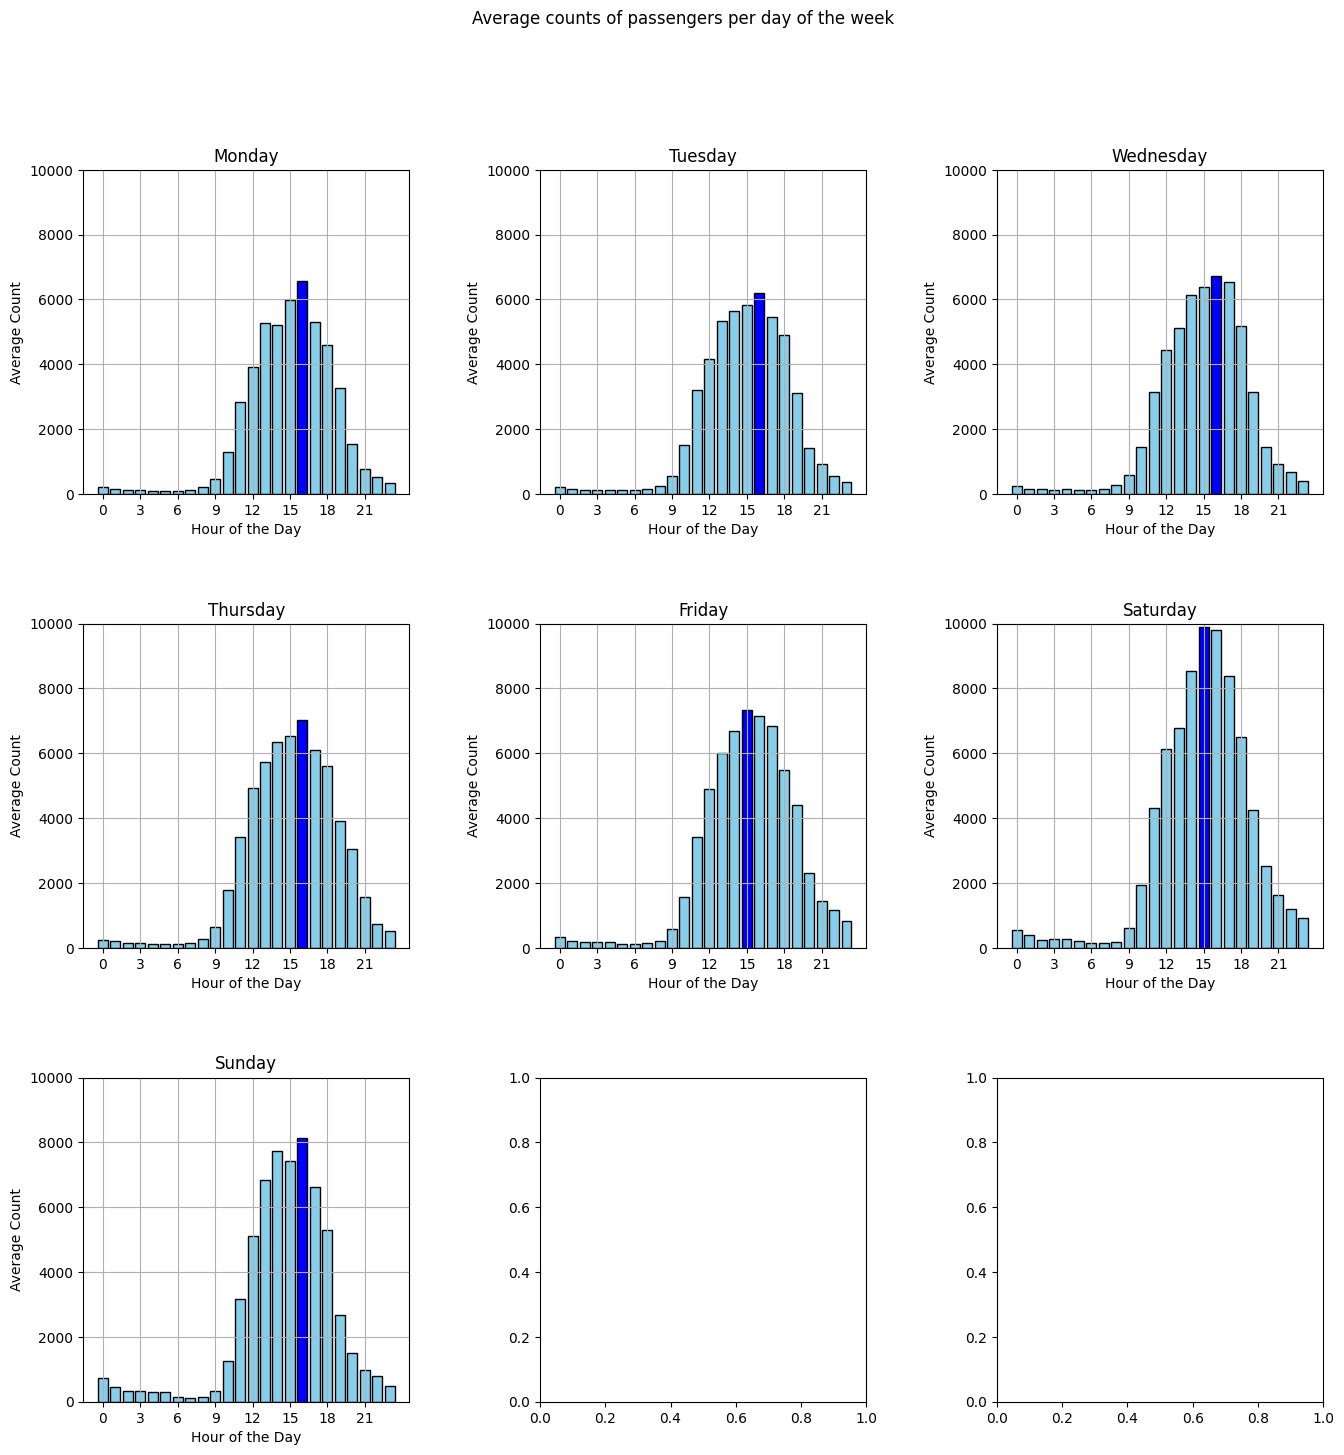

In [336]:
# Comparison traffic per day of the week

df_uur['dayOfWeek'] = df_uur['datetime'].dt.day_name()
df_uur['hour'] = df_uur['datetime'].dt.hour

fig, axs = plt.subplots(3, 3, figsize = (16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i, day in enumerate(days):
    ax = axs[i//3, i%3]

    day_data = df_uur[(df_uur['dayOfWeek'] == day)]
    mean_counts = day_data.groupby('hour')['countPassengers'].mean()
    max_count = mean_counts.max()

    colors = ['skyblue' if x < max_count else 'blue' for x in mean_counts]

    bars = ax.bar(mean_counts.index, mean_counts, color=colors, edgecolor='black')
    ax.set_title(day)  # Set the title to the day
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Count')
    ax.set_xticks(range(0, 24, 3))
    ax.set_ylim(0, 10000)
    ax.grid(True)
    
fig.suptitle('Average counts of passengers per day of the week')

Sadly, I lost... However, still had great pizza :D. I find it suprising to see how little variation there is between the days of the week. I expected somewhat of a spike during weekdays at lunch, but cannot really find that. 

## Goals and objectives

We try to analyze the traffic at the kalverstraat. For this research the following research questions have been established:

1. What are the times to avoid the Kalverstraat when going shopping? 
4. How do seasonal variations (summer vs winter) affect the traffic?
5. Does precipitation effect the traffic?


